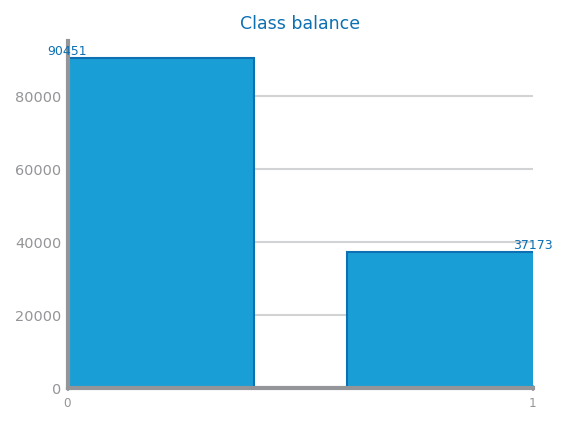

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,CovidPos
0,0.898586,0.338189,-0.437358,-0.471855,0.342132,-2.210911,0.906080,-0.728272,-0.212131,-0.230275,...,-0.834247,1.301233,-0.175588,-0.730806,1.627916,0.676197,-1.615982,1.552013,0.027731,0
1,0.898586,1.488966,-0.437358,-0.471855,0.342132,-2.210911,-1.159781,-0.728272,-0.212131,-0.230275,...,-0.834247,-1.102849,-0.175588,-0.730806,1.627916,0.676197,-1.615982,1.552013,0.027731,0
2,0.898586,1.488966,-0.437358,-0.471855,0.342132,0.452302,-0.126851,-0.728272,-0.212131,-0.230275,...,1.198685,-1.102849,-0.175588,-0.730806,1.627916,0.676197,-1.615982,1.552013,0.027731,0
3,0.898586,-1.963365,0.113917,-0.471855,0.342132,0.452302,1.939011,-0.728272,-0.212131,-0.230275,...,1.198685,-1.102849,-0.175588,-0.730806,1.627916,0.676197,-1.615982,1.552013,0.027731,0
4,0.898586,0.338189,-0.437358,-0.471855,0.342132,0.452302,-0.126851,-0.728272,-0.212131,-0.230275,...,-0.834247,-1.102849,-0.175588,-0.730806,1.627916,0.676197,-1.615982,1.552013,0.027731,0


In [2]:
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show
from library.dslabs_functions import plot_bar_chart
from sklearn.model_selection import train_test_split

target = "CovidPos"
original: DataFrame = read_csv(f"./datasets_generated/class_covid_pos_scaled_zscore.csv", sep=",", decimal=".")

# Split the DataFrame into train and test
train, test = train_test_split(original, test_size=0.3, random_state=42)

#Balance the train df keep test df
target_count: Series = train[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(
    target_count.index.to_list(), target_count.to_list(), title="Class balance"
)
show()
original.shape

In [3]:
df_positives: Series = train[train[target] == positive_class]
df_negatives: Series = train[train[target] == negative_class]

In [4]:
# Undersampling
file = 'Balacing_Approach1'
df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
df_under.to_csv(f"./{file}_under.csv")

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")


Minority class= 1 : 37173
Majority class= 0 : 37173
Proportion: 1.0 : 1


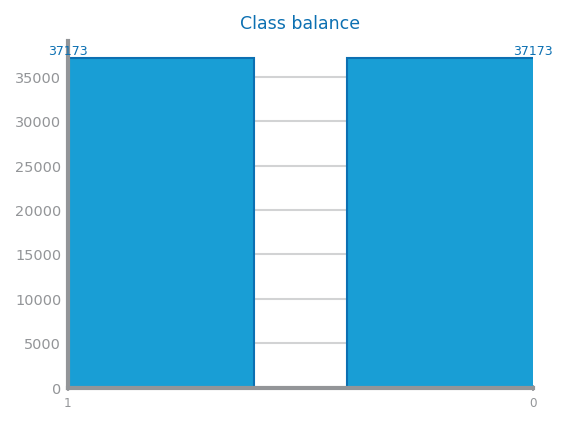

In [8]:
target_count_under: Series = df_under[target].value_counts()
figure()
plot_bar_chart(
    target_count_under.index.to_list(), target_count_under.to_list(), title="Class balance"
)
show()

{'GaussianNB': GaussianNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.5545743747257569, 'recall': 0.6500441306266549, 'precision': 0.35405006352367546, 'auc': 0.5828116311576906, 'f1': 0.45841947315771925}
1
5
10
15
20
25
{'accuracy': 0.5702245136755887, 'recall': 0.5665111587441685, 'precision': 0.3507826833743217, 'auc': 0.5691262082024906, 'f1': 0.4332794908266834}


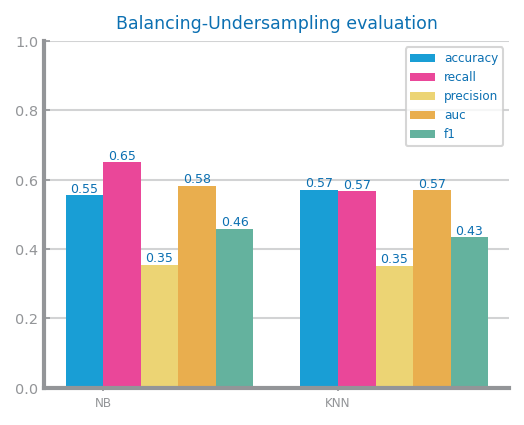

In [7]:
# Evaluation Approach#1
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Balancing-Undersampling"

figure()
eval: dict[str, list] = evaluate_approach(df_under, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
#savefig(f"./{file_tag}_eval.png")
show()

In [5]:
#OverSampling
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)
df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f"./{file}_over.csv")

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")

Minority class= 1 : 90451
Majority class= 0 : 90451
Proportion: 1.0 : 1


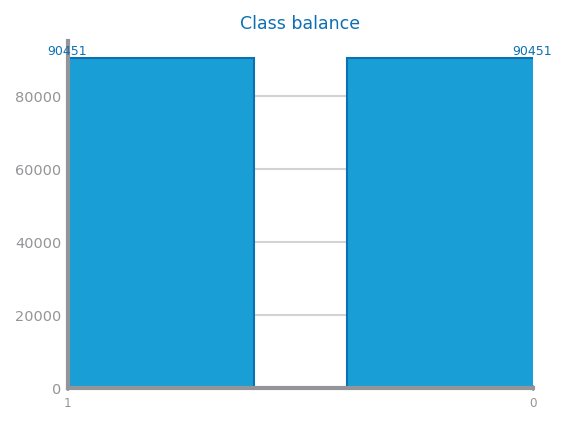

In [7]:
target_count_over: Series = df_over[target].value_counts()
figure()
plot_bar_chart(
    target_count_over.index.to_list(), target_count_over.to_list(), title="Class balance"
)
show()

{'GaussianNB': GaussianNB(), 'MultinomialNB': MultinomialNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.5826820336403558, 'recall': 0.5994858893021221, 'precision': 0.365830051398438, 'auc': 0.5876545419275429, 'f1': 0.45437963769017126}
1
5
10
15
20
25
{'accuracy': 0.5650216395313813, 'recall': 0.5263618464231021, 'precision': 0.3388493768044504, 'auc': 0.5535816375769936, 'f1': 0.4122863385169001}


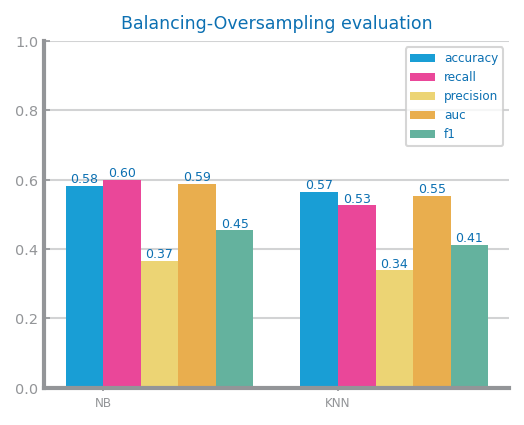

In [32]:
# Evaluation Approach #2
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Balancing-Oversampling"

figure()
eval: dict[str, list] = evaluate_approach(df_over, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()

In [9]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = train.pop(target).values
X: ndarray = train.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(train.columns) + [target]
df_smote.to_csv(f"./{file}_smote.csv")

smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)

Minority class= 1 : 90451
Majority class= 0 : 90451
Proportion: 1.0 : 1
(180902, 45)


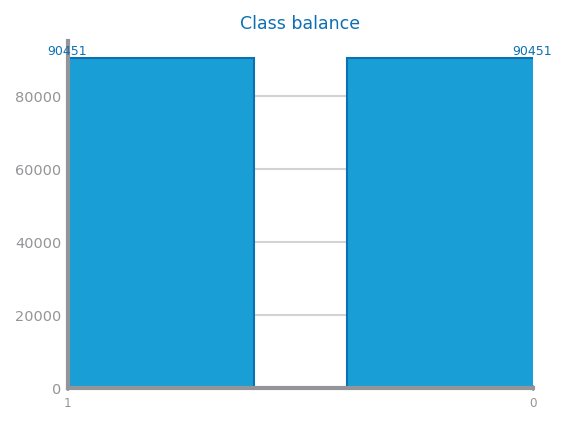

In [10]:
target_count_smote: Series = df_smote[target].value_counts()
figure()
plot_bar_chart(
    target_count_smote.index.to_list(), target_count_smote.to_list(), title="Class balance"
)
show()

{'GaussianNB': GaussianNB(), 'MultinomialNB': MultinomialNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.46560662026982036, 'recall': 0.7204112885583024, 'precision': 0.31535349182408007, 'auc': 0.5410070730100364, 'f1': 0.43867916673604984}
1
5
10
15
20
25
{'accuracy': 0.4938569095895623, 'recall': 0.6826733756289652, 'precision': 0.3233092444375372, 'auc': 0.5497304817647002, 'f1': 0.43880402875674535}


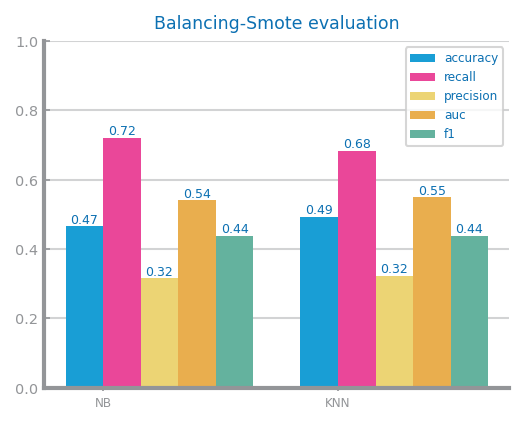

In [38]:
# Evaluation Approach#3
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Balancing-Smote"

figure()
eval: dict[str, list] = evaluate_approach(df_smote, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()